<p>
<b>Data de entraga:</b> 29/10. 
<p>
<b>Forma de entrega:</b> envie para levilelis@gmail.com o arquivo do seu notebook com a resposta teórica, a sua implementação, e o seu gráfico mostrando as frações das estratégias 49, 50 e 51 ao longo do tempo. 

<h3>Formulação do Problema</h3>

Em um problema visto em sala de aula, a mãe oferece a irmãs gêmeas o seguinte presente de aniversário. Cada irmã irá escolher um valor inteiro entre R\\$1,00 e R\\$101,00. Se a soma dos dois valores não exceder R\$101,00, as gêmeas ganham o valor pedido; elas recebem zero caso contrário. 

A estratégia que mais apareceu no nosso experimento em sala de aula foi R\\$50,00, mesmo sabendo que esse não é um equilíbrio de Nash: as irmãs têm um incentivo para desviar para R\\$51,00. Vamos derivar um equilíbrio de Nash com estratégias mistas em que joga-se quase sempre R\$50,00, como observado em sala de aula. 

Vamos denotar com $s_x$ a estratégia em que uma irmã pede o valor de x reais. E vamos supor que a estratégia mista utilizada pelas duas irmãs é denotada por $\sigma = p s_x + (1-p) s_y$, onde $p \in (0, 1)$ e $(\sigma, \sigma)$ é um equilíbrio de Nash misto. Como vimos em sala de aula, todo equilíbrio desse jogo deve ter o formato $x + y = 101$, por isso podemos assumir, sem perda de generalidade, que $x < y = 101 - x$.

Já que esse é um equilíbrio, a utilidade das duas estratégias $s_x$ e $s_y$ devem ser iguais. Quando jogando $s_x$, a jogadora garantidamente ganha $x$ reais. Quando jogando $s_y$, a jogadora ganha $y$ reais somente quando a outra irmã joga $s_x$, que ocorre com probabilidade $p$. Portanto, podemos escrever a frase "a utilidade de $s_x$ é igual a utilidade de $s_y$" matematicamente como: $x = py$.

<h3>Questão teórica</h3>

Mostre que qualquer $sigma$ satisfazendo as duas condições mostradas acima ($x < y = 101 - x$ e $x = py$) faz com que o perfil $(\sigma, \sigma)$ seja um equilíbrio de Nash. Para isso basta mostrar que qualquer estratégia pura $s_z$ obtém utilidade menor contra $\sigma$ do que $\sigma$ contra ela mesma. Dica: considere separadamente os seguintes casos: $z<x$, $x < z < 51$, $51 < z < y$ e $y < z$.  

Embora muitos valores de $x$ e $y$ satisfaçam as condições acima, os valores que retornam a maior utilidade são $x=50$, $y=51$. Isso é fácil de ver pois a utilidade das jogadoras no equilíbrio é $x$. E o valor de $p$ é dado por $\frac{50}{51} \approx 1$. Portanto, a intuição de jogar a estratégia 50 é condizente com o equilíbrio Nash derivado. 

<h3>Questão de Implementação</h3>

Nesse trabalho você irá implementar um algoritmo genético para aproximar o equilíbrio de Nash derivado acima. Essa abordagem genética é também conhecida como abordagem de agentes. Para tal, iremos escrever um programa de computador que irá gerar aleatoriamente uma população com $n$ agentes (estratégias do jogo, representados por um inteiro entre 1 e 101). 

<b>População e Adaptação</b>
<p>
A população será representada por um vetor de instâncias do objeto Agent (ver código abaixo). Em cada geração do processo, cada agente na população será pareado aleatoriamente com $k$ outros agentes da população. A capacidade de adaptação de cada agente (denotado por score na classe Agent abaixo) é a soma da utilidade do agente nessas $k$ partidas. 
    
<b>Reprodução e Sobrevivência</b>
<p>
Após cada agente jogar $k$ partidas, iremos eliminar da população os $m$ agentes com pior score, que serão substituidos por cópias dos $m$ agentes com maior score (i.e., substituimos o agente com menor score por uma cópia do agente com maior score, depois substituimos o agente com segundo menor score por uma cópia do agente com segundo maior score, fazemos isso até atingir o valor $m$ trocas).

<b>Mutação</b>
<p>
Após o processo de reprodução, iremos trocar, aleatoriamente a estratégia de $m$ agentes na população. Por exemplo, se um agente selecionado aleatoriamente representa a estratégia 43, iremos troca-la para um valor aleatório entre 1 e 101. 
    
<b>Resultados Esperados</b>
<p>
Iremos medir, ao longo das gerações, a fração da população que representa as estratégias 49, 50 e 51. A figura abaixo mostra como a proporção dessas três estratégias em 1000 gerações. Os valores utilizados para gerar o gráfico abaixo foram: $n=1000$, $k=100$ e $m = 10$.

<img src="https://github.com/gaabrielfranco/game-theory-w1/blob/master/plot.png?raw=1">

No início do processo evolutivo a estratégia 49 aparece como uma boa opção. Eventualmente a proporção de agentes aproxima o equilíbrio de Nash misto encontrado acima: joga-se a estratégia 50 na maior parte das vezes, com eventuais escolhas da estratégia 51. 

Esse experimento mostra que a distribuição de indivíduos em uma população pode aproximar, através de um processo evolutivo, a distribuição de probabilidade de um equilíbrio de Nash.

## Questão teórica

### Caso 1: $z < x$

Como $\sigma = p s_x + (1-p) s_y$ e $x = py$, podemos escrever $\sigma = \frac{x}{y} s_x + (1-\frac{x}{y}) s_y$. Como $x < y = 101 - x$, temos que $x < 101 - x$. Isso implica que $x < 50,5$

### Caso 2: $x < z < 51$

### Caso 3: $51 < z < y$


### Caso 4: $y < z$.  

## Questão de implementação

### Bibliotecas

In [1]:
import numpy as np
import random
import matplotlib.pylab as plt
import collections

### Definição da classe Agente

In [2]:
class Agent:
    def __init__(self, strategy = None):
        if (strategy is not None):
            self._strategy = strategy
        else:
            self._strategy = random.randint(1, 101)
        self._score = 0
    
    def compute_score(self, agent):
        if self._strategy + agent._strategy <= 101:
            self._score += self._strategy
            
    def set_random_strategy(self):
        self._strategy = random.randint(1, 101)
        
    def set_strategy(self, agent):
        self._strategy = agent._strategy
    
    def set_strategy_int(self, strategy_value):
        self._strategy = strategy_value
        
    def get_strategy(self):
        return self._strategy
    
    def get_score(self):
        return self._score
    
    def reset_score(self):
        self._score = 0
    
    def __str__(self):
        return "Estratégia: " + str(self._strategy) + " score: " + \
                str(self._score)    
    
    def __lt__(self, other):
         return self._score > other._score

### Função para plotar os resultados

Esse trecho de código usa os dicionários <tt>strategies_tracked</tt> e <tt>fraction_agents</tt> que foram populados durante a execução do processo evolutivo

In [36]:
def plot_results(agents, strategies_tracked, fraction_agents, epochs):
    plt.figure(1, figsize=(18, 15), dpi=300)
    
    plt.subplot(221)
    for s in strategies_tracked:
        plt.plot(list(range(1, len(fraction_agents[s]) + 1)), \
                 fraction_agents[s], label=str(s))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Gerações')
    plt.ylabel('Fração na População')
    plt.ylim(0, 1)
    plt.xlim(0, epochs)
    
    strategies = [0] * 101
    for agent in agents:
        strategies[agent.get_strategy() - 1] += 1
        
    plt.subplot(222)
    x = []
    y = (np.array(strategies) / len(agents)) * 100
    j = 0
    for i in range(0, len(y)):
        if (y[i] != 0):
            plt.bar(j, y[i])
            x.append(str(i + 1))
            j += 1
            
    plt.xticks(list(range(len(x))), x)
    plt.xlabel('Estratégias')
    plt.ylabel('Fração na População (em %)')
    plt.ylim(0, 100)
    
    plt.show()

### Algoritmo genético padrão

Esse algoritmo foi implementado idêntico a especificação do trabalho, inclusive os parâmetros

In [4]:
def generate_initial_population(agents, n, generate_method = "default"):
    if generate_method == "normal":
        # Gerando uma "distribuição normal" com inteiros no intervalo [1, 102]
        d1 = np.random.randint(1, 52, n)
        d2 = np.random.randint(1, 52, n)
        dsums = d1 + d2
        for i in range(0, n):
            agents.append(Agent(dsums[i]))
    else:
        for i in range(0, n):
            agents.append(Agent())

In [5]:
def mutation(agents, n, m, mutation_type = "default"):
    if mutation_type == "poly":
        for i in range(0, m):
            random_player = random.randint(0, n - 1)
            ri = random.random()
            delta = (2 * ri) ** (1 / 21) - 1 if ri < 0.5 \
                    else 1 - (2 * (1 - ri)) ** (1 / 21)
            new_strategy = round(agents[random_player].get_strategy() + \
                                 (100 * delta))
            agents[random_player].set_strategy_int(new_strategy)
    else:
        for i in range(0, m):
            random_player = random.randint(0, n - 1)
            agents[random_player].set_random_strategy()

In [6]:
def reproduction(agents, m, reproduction_type = "defaut"):
    if reproduction_type == "inter":
        for i in range(0, m):
            strategy_1 = agents[i].get_strategy()
            strategy_2 = agents[i + 1].get_strategy()
            score_1 = agents[i].get_score()
            score_2 = agents[i + 1].get_score()
            
            if (score_1 == score_2):
                alpha = 0.5
            elif score_1 - score_2 >= 10:
                alpha = 0.95
            else:
                if (score_1 - score_2 < 0):
                    print(score_1, score_2)
                alpha = (score_1 - score_2) * 0.1
            
            new_strategy = round((strategy_1 * alpha) + (strategy_2 * \
                                                         (1 - alpha)))
            agents[len(agents) - 1 - i].set_strategy_int(new_strategy)
    else:
        for i in range(0, m):
            agents[len(agents) - 1 - i].set_strategy(agents[i])

In [9]:
def GA(epochs = 1000, n = 1000, k = 100, m = 10, mutation_type = "default", \
       reproduction_type = "default", generate_method = "default"):
    # Geração da população de agentes
    agents = []
    generate_initial_population(agents, n, generate_method)
        
    strategies_tracked = {49, 50, 51}
    
    # O dict fraction_agents recebe a fração das estratégias 49, 50 e 51 nas 
    # várias gerações do processo evolutivo. 
    
    fraction_agents = {}
    for s in strategies_tracked:
        fraction_agents[s] = []
        fraction_agents[s] = []
        fraction_agents[s] = []
    
    # O dict number_agents contabiliza o número de agentes representando uma 
    # estratégia.
    
    number_agents = {}
    
    # Para cada geração
    for i in range(0, epochs):
        # Cada agente joga k partidas contra jogadores aleatórios
        for agent in agents:
            for num_matches in range(k):
                random_player = random.randint(0, n - 1)
                agent.compute_score(agents[random_player])

        # Ordena agentes pelo score
        agents.sort()

        # Faz as trocas dos m melhores com os m piores
        reproduction(agents, m, reproduction_type)

        # Trocando o valor de m estratégias aleatóriamente (mutação)
        mutation(agents, n, m, mutation_type)

        # Limpando os scores para a próxima geração
        for agent in agents:
            agent.reset_score()

        # Coletando estatísticas para gerar o gráfico
        number_agents.clear()
        for agent in agents:
            strategy = agent.get_strategy()            
            if strategy not in number_agents:
                number_agents[strategy] = 1
            else:
                number_agents[strategy] += 1

        # Calculando a fração das estratégias 49, 50 e 51 na população
        for s in strategies_tracked:
            if s in number_agents: 
                fraction_agents[s].append(number_agents[s]/n)
                
    plot_results(agents, strategies_tracked, fraction_agents, epochs)

### Testando variações do algoritmo genético

1) Genético padrão

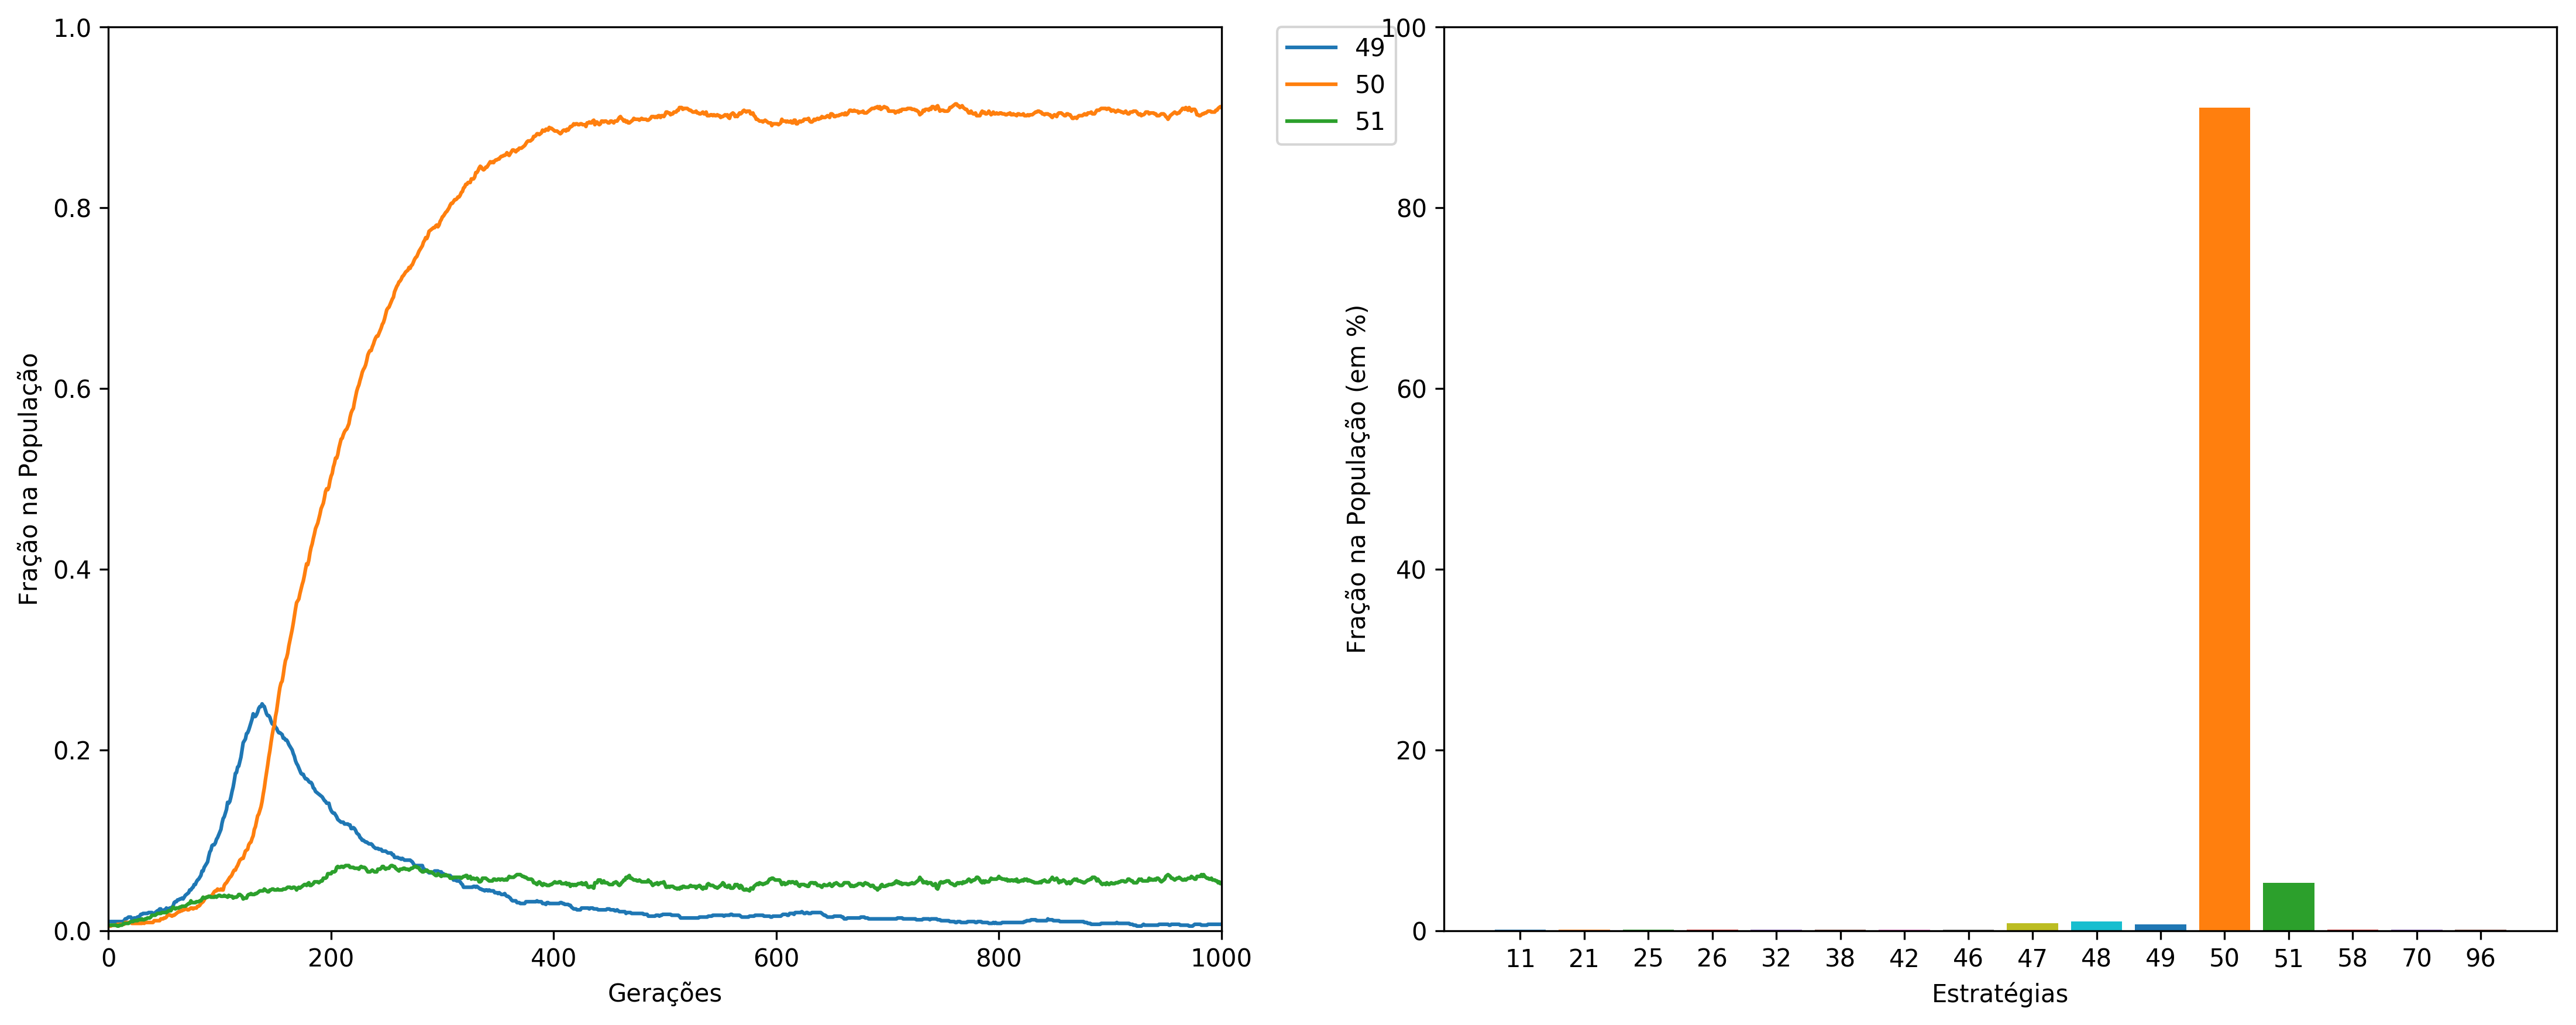

In [37]:
GA()

2) Genético padrão com $m = 100$

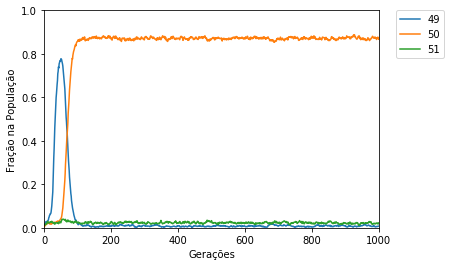

In [0]:
GA(m = 100)

3) Genético com a mutação polinomial

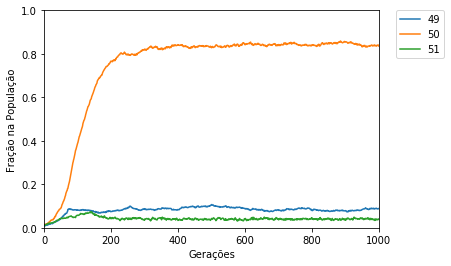

In [0]:
GA(mutation_type = "poly")

4) Genético com *Intermediate crossover*

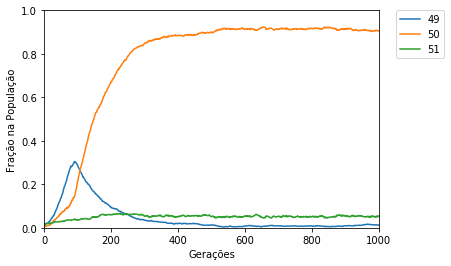

In [0]:
GA(reproduction_type = "inter")

5) Genético com mutação polinomial e *Intermediate crossover*

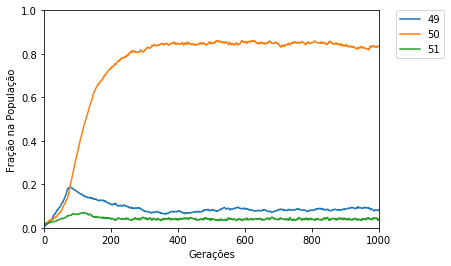

In [0]:
GA(mutation_type = "poly", reproduction_type = "inter")

6) Genético com $m = 100$, mutação polinomial e *Intermediate crossover*

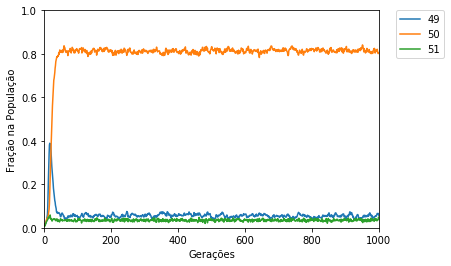

In [0]:
GA(m = 100, mutation_type = "poly", reproduction_type = "inter")

7) Genético com geração da população inicial seguindo a distribuição normal

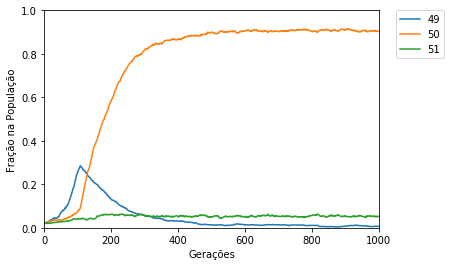

In [0]:
GA(generate_method = "normal")

8) Genético com geração da população inicial seguindo a distribuição normal, mutação polinomial e *Intermediate crossover*

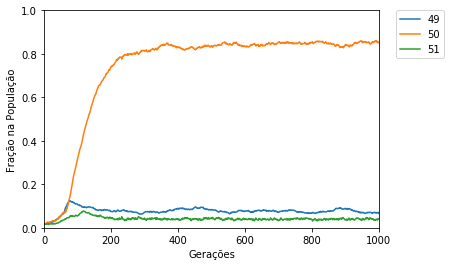

In [0]:
GA(mutation_type = "poly", reproduction_type = "inter", generate_method = "normal")

9) Genético com $m = 100$, geração da população inicial seguindo a distribuição normal, mutação polinomial e *Intermediate crossover*

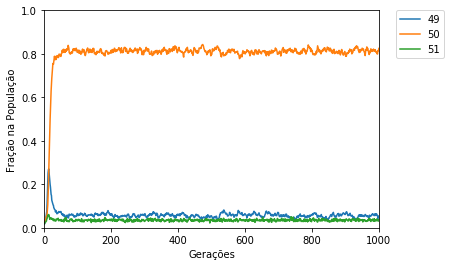

In [0]:
GA(m = 100, mutation_type = "poly", reproduction_type = "inter", generate_method = "normal")

### Colônia de formigas

Essa é uma tentativa de adaptar a ideia de colônia de formigas para esse problema

In [38]:
def solution_construction(agents, pheromones):
    prob = []
    for i in range(1, 102):
        n = int(pheromones[i - 1] * 100)
        for j in range(n):
            prob.append(i)
    #print(prob)
    random.shuffle(prob)
    for agent in agents:
        random_pos = random.randint(0, len(prob) - 1)
        agent.set_strategy_int(prob[random_pos])       

In [41]:
def ACO(iterations = 1000, n = 1000, k = 100, m = 10, decay = 0.7):
    # Geração da população de agentes
    agents = []
    generate_initial_population(agents, n)

        
    strategies_tracked = {49, 50, 51}
    
    # O dict fraction_agents recebe a fração das estratégias 49, 50 e 51 nas 
    # várias gerações do processo evolutivo. 
    
    fraction_agents = {}
    for s in strategies_tracked:
        fraction_agents[s] = []
        fraction_agents[s] = []
        fraction_agents[s] = []
    
    # O dict number_agents contabiliza o número de agentes representando uma 
    # estratégia.
    
    number_agents = {}
    
    # Vetor de feromônios (estratégia, feromônio)
    #pheromones = collections.OrderedDict()
    #for strategy in range(1, 102):
    #    pheromones[strategy] = 1 / 101
    pheromones = [1 for i in range(1, 102)]
    #pheromones[49] += 2
    
    # Para cada iteração
    for i in range(0, iterations):
        # Cada agente joga k partidas contra jogadores aleatórios
        for agent in agents:
            for num_matches in range(k):
                random_player = random.randint(0, n - 1)
                agent.compute_score(agents[random_player])
                
        # Ordenando os agentes pelo score
        agents.sort()
        
        # Fase de evaporação do feromônio
        for p in range(len(pheromones)):
            pheromones[p] *= decay
            
        # Fase de reforço do feromônio (aumentar as m melhores)
        for j in range(0, m):
            strategy = agents[j].get_strategy()
            delta = (agents[j].get_score() / k) * 0.01
            pheromones[strategy - 1] += delta
        
        # Construir uma nova solução baseada nos feromônios
        solution_construction(agents, pheromones)

        # Limpando os scores para a próxima geração
        for agent in agents:
            agent.reset_score()

        # Coletando estatísticas para gerar o gráfico
        number_agents.clear()
        for agent in agents:
            strategy = agent.get_strategy()            
            if strategy not in number_agents:
                number_agents[strategy] = 1
            else:
                number_agents[strategy] += 1

        # Calculando a fração das estratégias 49, 50 e 51 na população
        for s in strategies_tracked:
            if s in number_agents: 
                fraction_agents[s].append(number_agents[s]/n)
                
    plot_results(agents, strategies_tracked, fraction_agents, iterations)

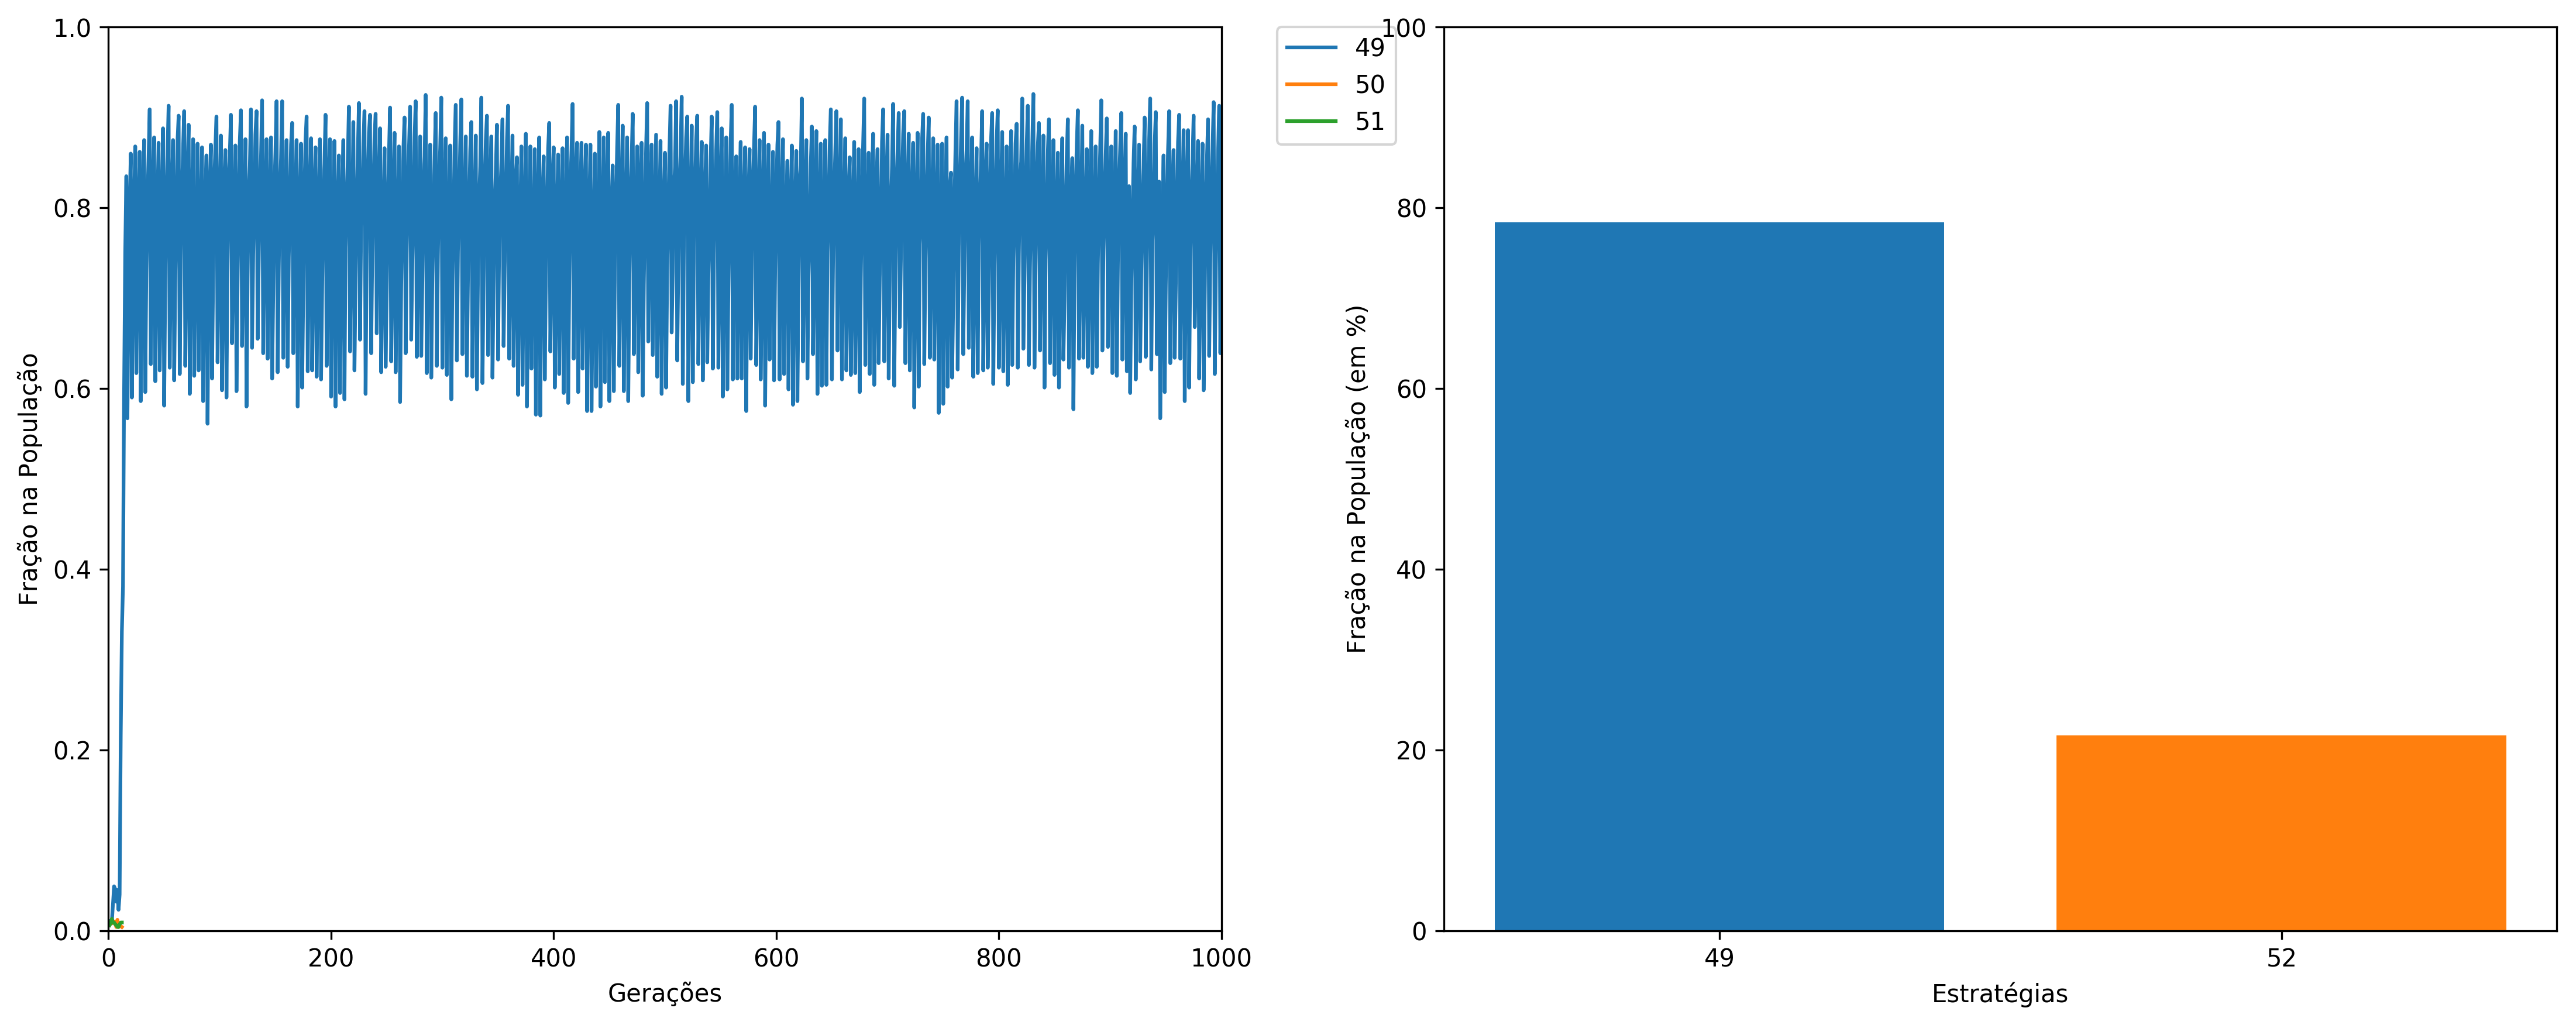

In [42]:
ACO(m = 1, decay = 0.7)